In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Downloads/haberman.csv')

In [3]:
df.columns=['Age','Year','Nodes','Survival']

In [4]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Agenda :- Given a patient with the some Age, of Operation and number of Lymph nodes detected,  we have to predict or conclude 
The chance whether the patient will live then 5 years or more then 5 year

In [5]:
df.shape

(305, 4)

In [6]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [8]:
# We will not remove duplicates, as these can be a genuine possibility

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [11]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
# MIN(AGE)=30, MAX(AGE)=85, YEAR(1958,1969),NODES=[0,52], SURVIVAL=[1,2]
# NODES have higher count DEnsity between 0 and 4(75% percentile)

# UNIVARIATE ANANLYSIS

## 1. Survival

In [13]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [14]:
df.Survival.value_counts(1)

Survival
1    0.734426
2    0.265574
Name: proportion, dtype: float64

In [15]:
# There are only 27% who will be living less then 5 years, which means the dataset is imbalanced.

<Axes: xlabel='Survival', ylabel='count'>

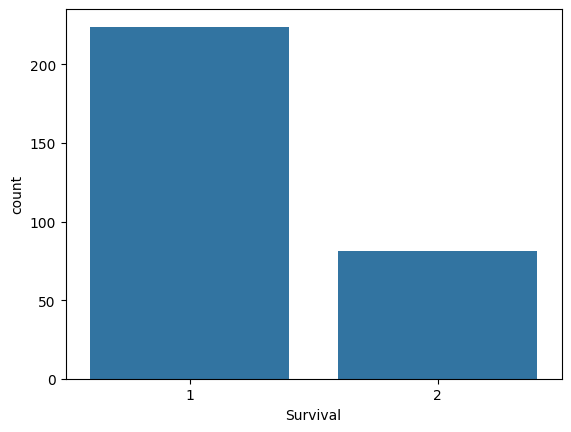

In [16]:
sns.countplot(x="Survival", data=df)

## 2. AGE

In [17]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

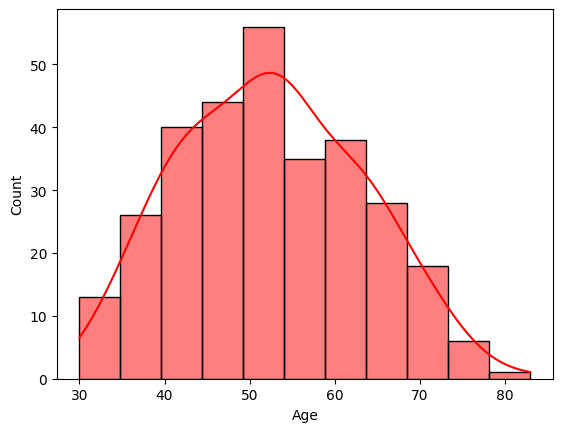

In [18]:
print(df.Age.skew())
sns.histplot(x='Age',data=df,binwidth=5 ,color='red', kde= True, )

In [19]:
# The Maximum people who were opereated where in the age group of 50 to 55.

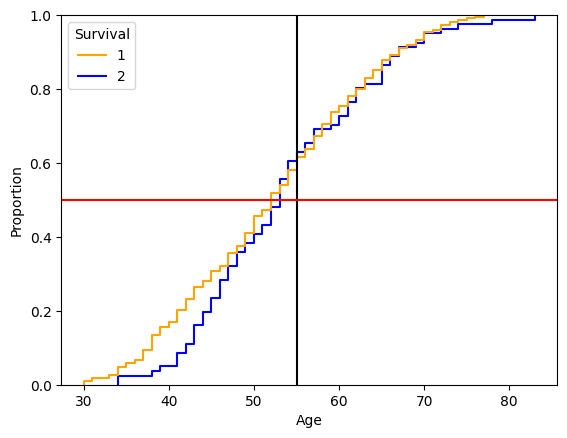

In [20]:
sns.ecdfplot(x='Age', data=df,  hue= 'Survival',  palette={1: "orange", 2: "blue"})
plt.axvline(55, c='black' )
plt.axhline(0.5,c= 'red')

In [21]:
# 80% of the people were 65 years or below
# 50% of the people were 52 years or below

# 3. Operation year

<Axes: xlabel='Year'>

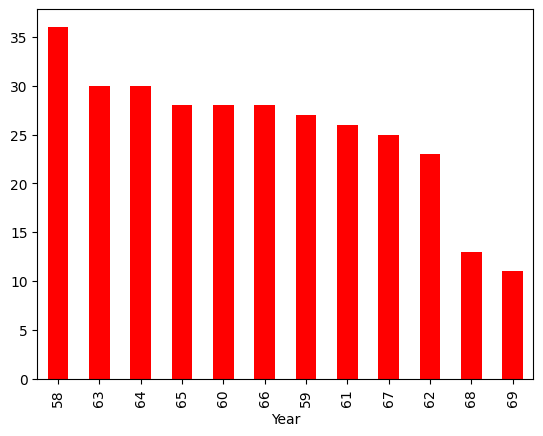

In [22]:
df.Year.value_counts().plot(kind = 'bar',color ='red')

## 4. Lymoh nodes

In [23]:
df.Nodes.describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

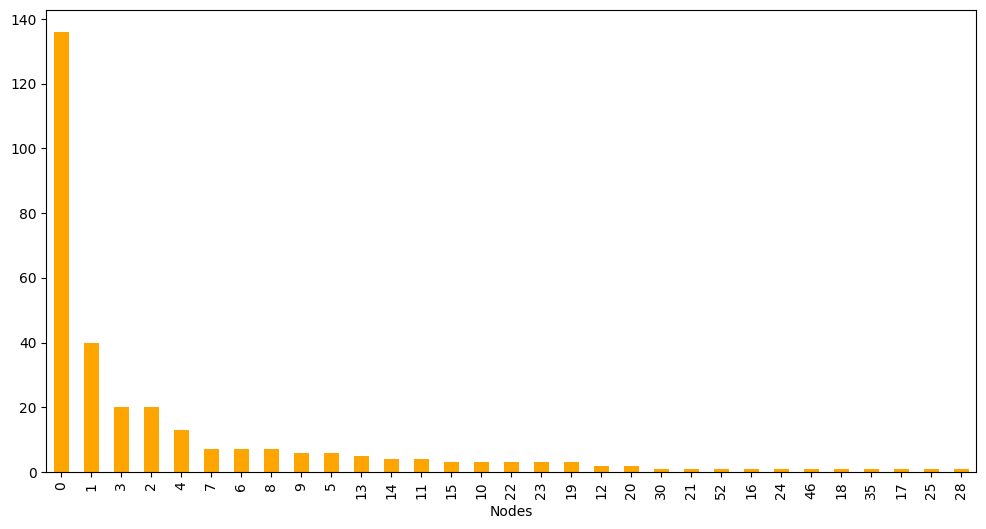

In [24]:
plt.figure (figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar', color='orange')

2.9776817337612087


<Axes: xlabel='Nodes', ylabel='Count'>

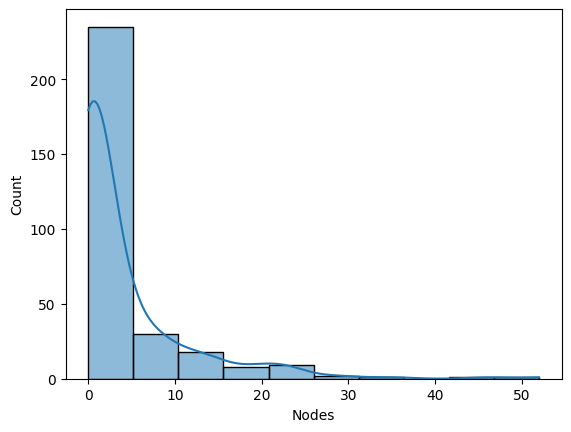

In [25]:
print(df.Nodes.skew())
sns.histplot(x="Nodes",data=df, binwidth=5, kde=True)

In [26]:
# Maximum Density Count for Nodes is between 0 and 10.

## BIVARIATE ANALYSIS

In [29]:
## Bivariate :- It's Analysis two variable two features at a time

In [30]:
# Age - Surviaval
# Age - Nodes - Survival
# Nodes - Survival
# Year - Survival
# Year-  Nodes
# Age- Years

<Axes: xlabel='Survival', ylabel='Age'>

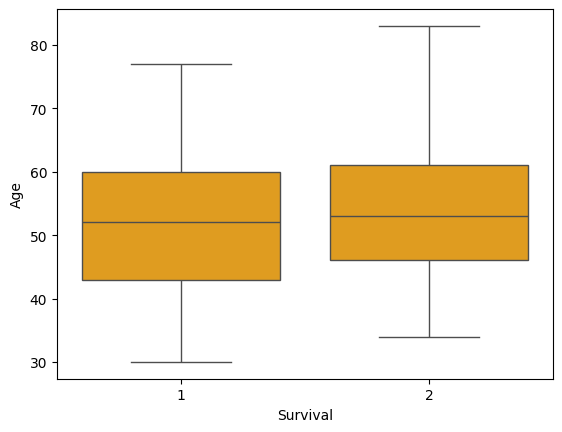

In [35]:
sns.boxplot(x="Survival", y= "Age", data=df, color='orange')

In [37]:
# People with age>77 will actually live lesser than 5 years.

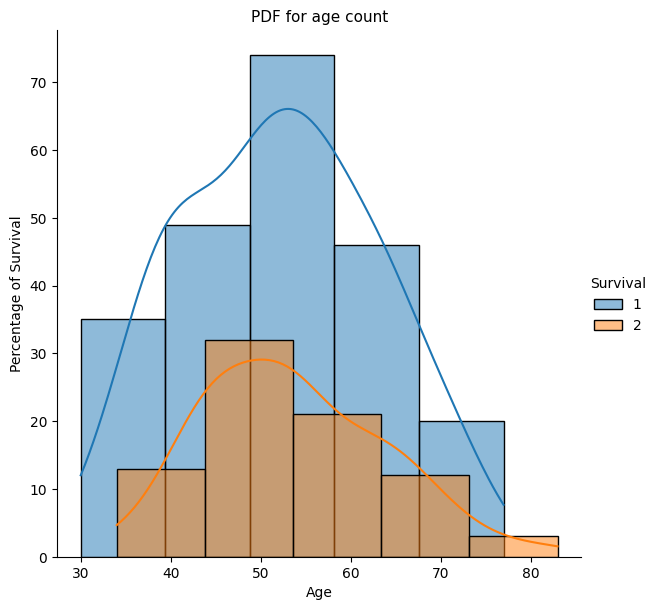

In [47]:
sns.FacetGrid(df, hue='Survival',height = 6).map(sns.histplot,'Age',bins=5,kde=True).add_legend()
plt.xlabel("Age")
plt.ylabel('Percentage of Survival')
plt.title ('PDF for age count', size=11)
plt.show()

In [48]:
# Maximum People of leving less than 5 years.

In [51]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
52    18
53    17
54    17
43    15
47    14
50    14
57    14
65    14
41    13
49    12
61    12
45    12
55    12
42    11
46    11
38    11
44    10
48    10
62    10
34     9
63     9
59     9
56     9
70     9
51     8
67     8
60     8
58     7
66     7
39     7
37     6
64     5
69     5
72     5
40     3
74     3
35     2
30     2
33     2
31     2
36     2
78     2
68     2
73     2
83     2
71     1
75     1
77     1
76     1
Name: Survival, dtype: int64

In [52]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
43    11
57    11
53    11
47    11
41    10
38    10
65    10
55    10
49    10
42     9
45     9
61     9
63     8
59     8
34     7
44     7
46     7
58     7
62     7
56     7
70     7
48     7
60     6
51     6
67     6
39     6
37     6
64     5
66     5
69     4
72     4
40     3
35     2
36     2
30     2
33     2
31     2
68     2
74     2
73     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

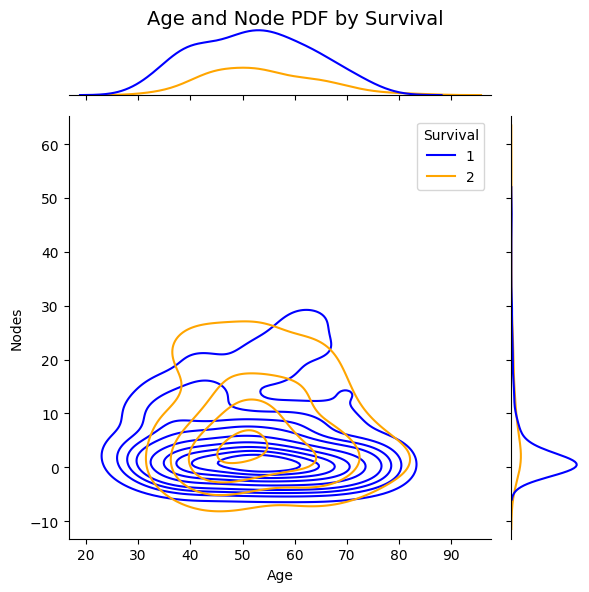

In [63]:
sns.jointplot(x= 'Age',y='Nodes',data=df, hue='Survival',kind='kde', palette={1: 'blue', 2: 'orange'} )
plt.suptitle('Age and Node PDF by Survival', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show;

<Axes: xlabel='Survival', ylabel='Nodes'>

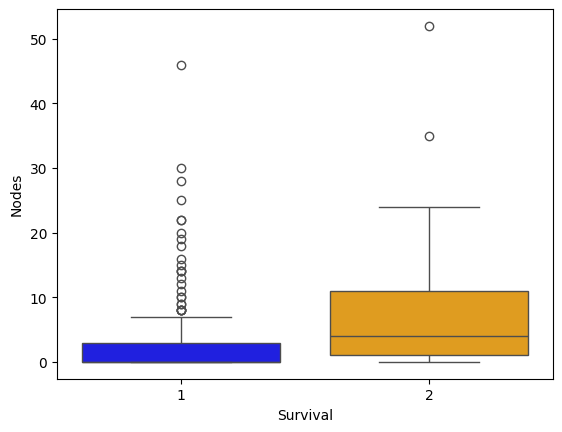

In [71]:
sns.boxplot(x= 'Survival',y='Nodes',data=df, palette={'1': 'blue', '2': 'orange'}
)

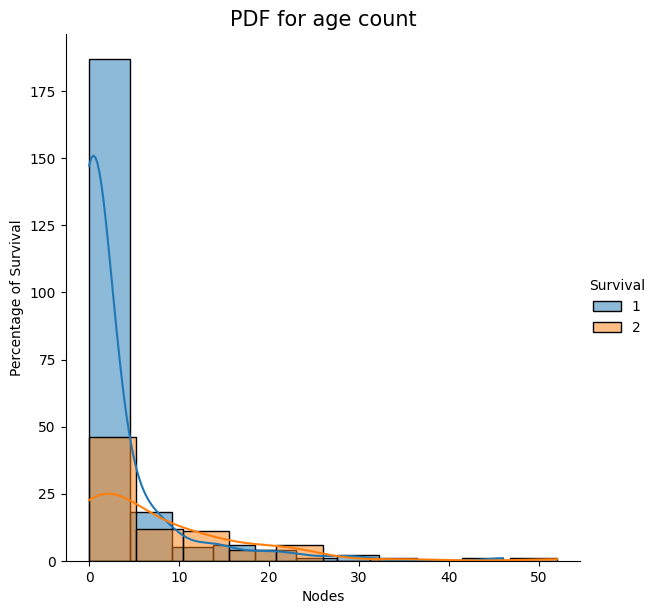

In [76]:
sns.FacetGrid(df, hue='Survival',height = 6).map(sns.histplot,'Nodes',bins=10,kde=True, alpha=0.5).add_legend()

plt.xlabel("Nodes")
plt.ylabel('Percentage of Survival')
plt.title ('PDF for age count', size=15)
plt.show();

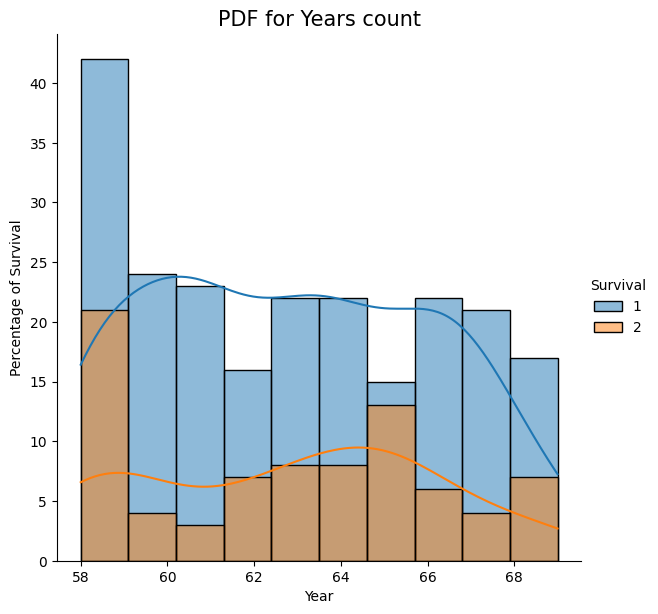

In [80]:
sns.FacetGrid(df, hue='Survival',height = 6).map(sns.histplot,'Year',bins=10,kde=True, alpha=0.5).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title ('PDF for Years count', size=15)
plt.show();

In [81]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
1,24,18,24,23,16,22,22,15,22,21,10,7
2,12,9,4,3,7,8,8,13,6,4,3,4


In [82]:
13/15

0.8666666666666667

In [83]:
# 1965 - 46 % People died
# 1958 - 33 % died , 1959 - 45%
# 33% people died before 5 years when operated between 1965,66

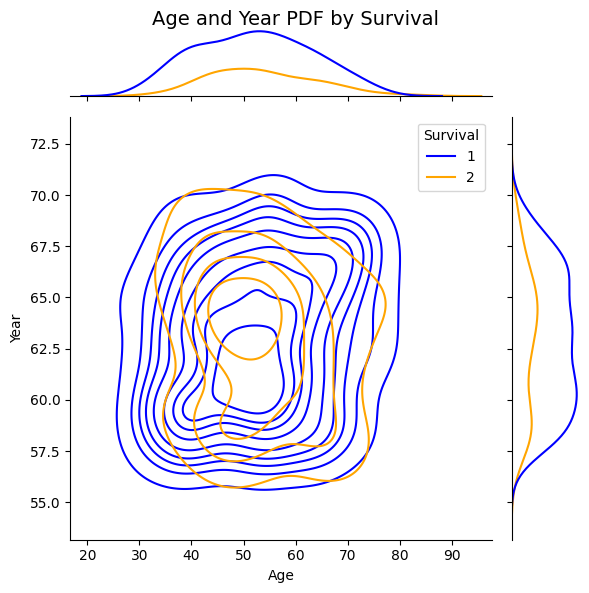

In [85]:
sns.jointplot(x= 'Age',y='Year',data=df, hue='Survival',kind='kde', palette={1: 'blue', 2: 'orange'} )
plt.suptitle('Age and Year PDF by Survival', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show;

# MULTIVARIATE ANALYSIS

In [ ]:
#IS generay used for core relation

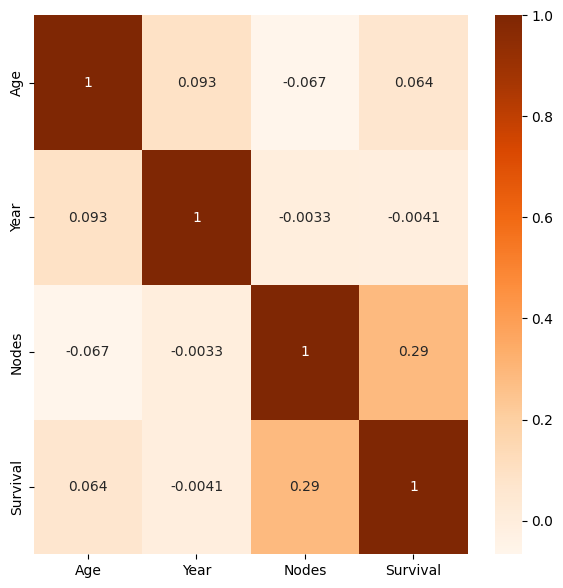

In [93]:
plt.figure(figsize=(7,7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Oranges', annot=True);

# Nodes and Survival are co-related by 29%